# PARTE 4 - Ejercicios sobre Generación de V.A P2

## Task 1

### Describa un algoritmo para generar V
Para generar la variable aleatoria V con función de probabilidad acumulada F(x) descrita como:

F(x) = Σ Pi * Fi(x) para i de 1 a n

donde Pi es la probabilidad asociada a la función de probabilidad acumulada Fi(x) y n es el número total de funciones de probabilidad acumuladas que se están sumando, podemos utilizar el método de composición. El método de composición es un enfoque ampliamente utilizado para generar variables aleatorias a partir de funciones de probabilidad acumulada.

Algoritmo para generar V utilizando el método de composición:

* Paso 1: Generar una variable aleatoria discreta W con valores enteros entre 1 y n, de acuerdo con las probabilidades P1, P2, ..., Pn. Esto se puede hacer utilizando el método de la función de probabilidad inversa o cualquier otro método adecuado para generar variables aleatorias discretas con probabilidades dadas.

* Paso 2: Una vez que tenemos el valor de W, generamos una variable aleatoria X con función de probabilidad acumulada Fi(x) correspondiente a la función Fi asociada al valor de W.

* Paso 3: El valor generado V será el valor de X.

### Demostracion de que el algoritmo genera V adecuadamente
Para demostrar que el algoritmo genera V adecuadamente, debemos demostrar que la función de probabilidad acumulada de V es F(x).

La función de probabilidad acumulada de V es:

Fv(x) = P(V <= x) = P(X <= x | W = 1) * P(W = 1) + P(X <= x | W = 2) * P(W = 2) + ... + P(X <= x | W = n) * P(W = n)

Como W es una variable aleatoria discreta, entonces:

P(W = i) = Pi para i de 1 a n

Por lo tanto, la función de probabilidad acumulada de V es:

Fv(x) = P(X <= x | W = 1) * P1 + P(X <= x | W = 2) * P2 + ... + P(X <= x | W = n) * Pn

Como X es una variable aleatoria continua, entonces:

P(X <= x | W = i) = Fi(x) para i de 1 a n

Por lo tanto, la función de probabilidad acumulada de V es:

Fv(x) = F1(x) * P1 + F2(x) * P2 + ... + Fn(x) * Pn

Como F(x) = Σ Pi * Fi(x) para i de 1 a n, entonces:

Fv(x) = F(x)

Por lo tanto, el algoritmo genera V adecuadamente.

## Task 2

Variable aleatoria generada: 3


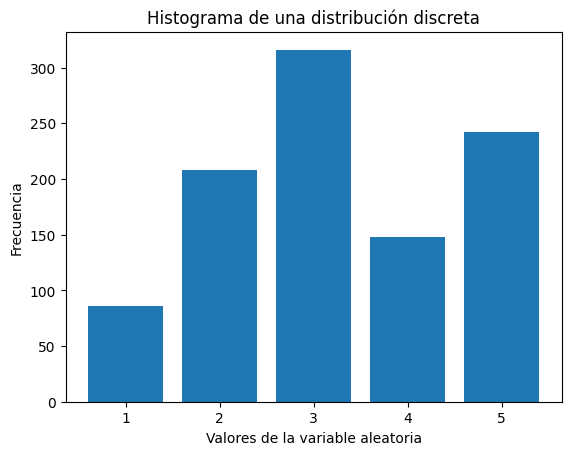

In [2]:
import matplotlib.pyplot as plt
import random

def generate_discrete_random_variable(probabilities):
    # Verificar que las probabilidades sumen 1
    if abs(sum(probabilities) - 1.0) > 1e-5:
        raise ValueError("Las probabilidades deben sumar 1.")

    # Generar un número aleatorio entre 0 y 1
    random_value = random.random()

    # Encontrar el intervalo en el que cae el número aleatorio
    cumulative_prob = 0.0
    for i, prob in enumerate(probabilities):
        cumulative_prob += prob
        if random_value <= cumulative_prob:
            return i + 1  # Devolver el valor de la variable aleatoria

    # Si por alguna razón no se devuelve en el ciclo, retornar el último valor posible
    return len(probabilities)

# Ejemplo de distribución de probabilidad
probabilities = [0.1, 0.2, 0.3, 0.15, 0.25]

# Generar la variable aleatoria
random_variable = generate_discrete_random_variable(probabilities)
print("Variable aleatoria generada:", random_variable)

# Ejemplo de distribución de probabilidad
probabilities = [0.1, 0.2, 0.3, 0.15, 0.25]

# Generar una muestra de 1000 valores aleatorios
sample_size = 1000
random_samples = [generate_discrete_random_variable(probabilities) for _ in range(sample_size)]

# Crear el histograma
plt.hist(random_samples, bins=range(1, len(probabilities) + 2), align='left', rwidth=0.8)
plt.xticks(range(1, len(probabilities) + 1))
plt.xlabel("Valores de la variable aleatoria")
plt.ylabel("Frecuencia")
plt.title("Histograma de una distribución discreta")
plt.show()


## Task 3


In [3]:
import random
import numpy as np

def generate_cash_flow_table_hotel():
    return [-800,
            np.random.normal(-800, 50),
            np.random.normal(-800, 100),
            np.random.normal(-700, 150),
            np.random.normal(300, 200),
            np.random.normal(400, 200),
            np.random.normal(500, 200),
            np.random.uniform(200, 8440)]

def generate_cash_flow_table_centro_comercial():
    return [-900,
            np.random.normal(-600, 50),
            np.random.normal(-200, 60),
            np.random.normal(-600, 100),
            np.random.normal(250, 150),
            np.random.normal(350, 150),
            np.random.normal(400, 150),
            np.random.uniform(1600, 6000)]

def calculate_present_value(cash_flows, discount_rate=0.10):
    present_value = 0
    for t, cash_flow in enumerate(cash_flows):
        present_value += cash_flow / (1 + discount_rate) ** t
    return present_value

def simulate_project(project_cash_flow_func, iterations):
    npvs = []
    for _ in range(iterations):
        cash_flows = project_cash_flow_func()
        npv = calculate_present_value(cash_flows)
        npvs.append(npv)
    return npvs

# Simulaciones con 100, 1,000 y 10,000 iteraciones para el Proyecto Hotel
iterations_list = [100, 1000, 10000]
for iterations in iterations_list:
    npvs_hotel = simulate_project(generate_cash_flow_table_hotel, iterations)
    average_npv_hotel = np.mean(npvs_hotel)
    print(f"Promedio de VPN para el Proyecto Hotel con {iterations} iteraciones: {average_npv_hotel:.2f}")

# Simulaciones con 100, 1,000 y 10,000 iteraciones para el Proyecto Centro Comercial
for iterations in iterations_list:
    npvs_centro_comercial = simulate_project(generate_cash_flow_table_centro_comercial, iterations)
    average_npv_centro_comercial = np.mean(npvs_centro_comercial)
    print(f"Promedio de VPN para el Proyecto Centro Comercial con {iterations} iteraciones: {average_npv_centro_comercial:.2f}")


Promedio de VPN para el Proyecto Hotel con 100 iteraciones: 194.98
Promedio de VPN para el Proyecto Hotel con 1000 iteraciones: 223.25
Promedio de VPN para el Proyecto Hotel con 10000 iteraciones: 260.19
Promedio de VPN para el Proyecto Centro Comercial con 100 iteraciones: 556.16
Promedio de VPN para el Proyecto Centro Comercial con 1000 iteraciones: 506.32
Promedio de VPN para el Proyecto Centro Comercial con 10000 iteraciones: 503.09
